## EDA on movies dataset

In [32]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
warnings.filterwarnings('error')

In [19]:
# Loading the dataset
df = pd.read_csv("16k_Movies.csv")
df.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


In [20]:
# basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16290 non-null  int64  
 1   Title                16290 non-null  object 
 2   Release Date         16290 non-null  object 
 3   Description          16290 non-null  object 
 4   Rating               12846 non-null  float64
 5   No of Persons Voted  12829 non-null  object 
 6   Directed by          16283 non-null  object 
 7   Written by           15327 non-null  object 
 8   Duration             16277 non-null  object 
 9   Genres               16285 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [21]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                0
Title                     0
Release Date              0
Description               0
Rating                 3444
No of Persons Voted    3461
Directed by               7
Written by              963
Duration                 13
Genres                    5
dtype: int64

In [22]:
# Shape of the table.
df.shape

(16290, 10)

In [23]:
# not filling the rating and number of persons voted as it can create wrong impression of the movie recommendation.

In [24]:
# Column info.
'''
Title: The name of the movie.
Release Date: When the movie was released.
Description: A brief synopsis of the movie.
Rating: User/critic ratings (depending on the source).
No of Persons Voted: The number of votes the movie has received.
Directed by: The director(s) of the movie.
Written by: The writer(s) of the movie.
Duration: The runtime of the movie.
Genres: The movie's genres.
'''

"\nTitle: The name of the movie.\nRelease Date: When the movie was released.\nDescription: A brief synopsis of the movie.\nRating: User/critic ratings (depending on the source).\nNo of Persons Voted: The number of votes the movie has received.\nDirected by: The director(s) of the movie.\nWritten by: The writer(s) of the movie.\nDuration: The runtime of the movie.\nGenres: The movie's genres.\n"

In [25]:
# Dropping the unwanted columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [26]:
df.head()

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


In [30]:
# date handling.
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
# Extract the year only
df['Release Date'] = df['Release Date'].dt.year
df.head(2)

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,Dekalog (1988),1996,This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,Three Colors: Red,1994,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"


### Univariate Analysis

#### Rating

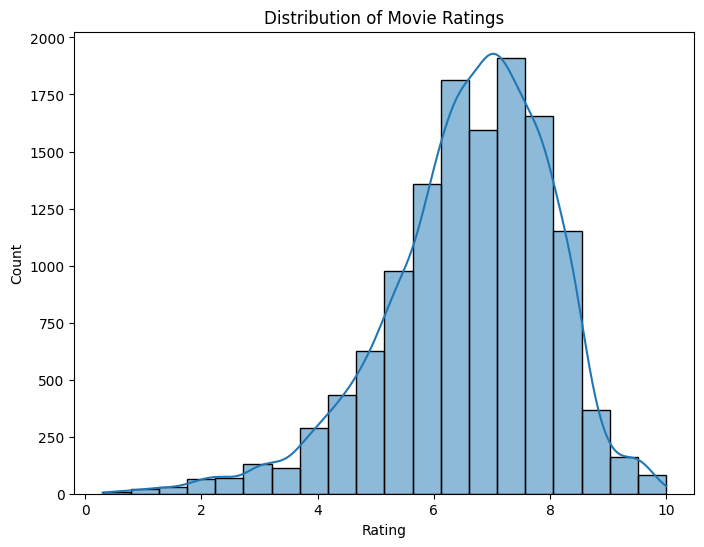

In [35]:
# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()

#### No. of Persons Voted

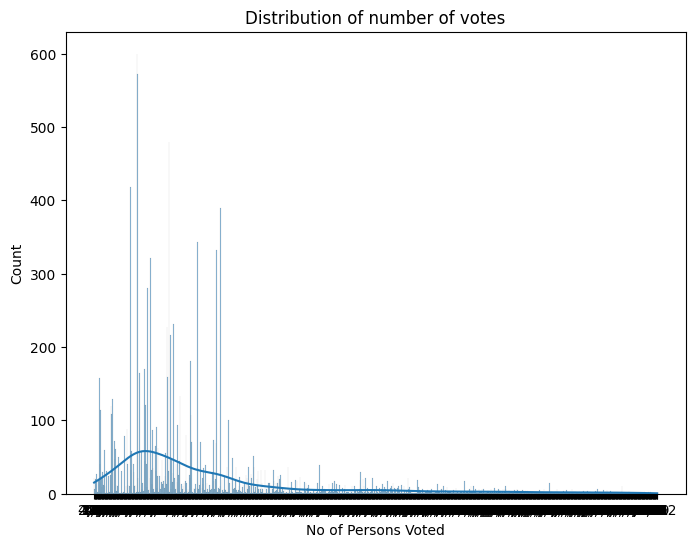

In [43]:
# Distribution of number of persons voted
plt.figure(figsize=(8, 6))
my_plot = sns.histplot(df['No of Persons Voted'], bins=30, kde=True)
plt.title("Distribution of number of votes")
# rotate the x ticks
# plt.xticks(rotation=90) 
plt.show()